In [2]:
#utils 
import pandas as pd

In [3]:
train_file =  "csvs/train.csv"

with open(train_file, 'r') as input_2:
    train_data = pd.read_csv(input_2)

#Adding start price 
train_data['start_cost'] = (train_data['now_cost']+(-1*train_data['cost_change_start']))/10
train_data['now_cost'] = train_data['now_cost']/10

train_data['direct_freekicks_order'] = pd.to_numeric(train_data['direct_freekicks_order'], errors="coerce")
train_data['penalties_order'] = pd.to_numeric(train_data['penalties_order'], errors="coerce")

train_data

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,...,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards,start_cost
0,0,0,0,0,0,0,37605,None,NaN,0,...,0,3441,0,54937,0,0.0,0.0,Özil,0,7.0
1,0,0,0,0,0,0,39476,None,NaN,0,...,0,10266,0,19142,0,0.0,0.0,Sokratis,0,5.0
2,0,0,230,100,50,3,41270,None,NaN,0,...,41,77302,0,131045,0,0.0,7.6,David Luiz,1,5.5
3,3,11,358,100,100,10,54694,None,NaN,0,...,131,1240132,0,3870817,0,0.3,11.6,Aubameyang,2,12.0
4,1,3,125,100,100,2,58822,None,NaN,0,...,28,41602,0,66906,0,0.0,6.1,Cédric,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,0,0,0,None,None,0,448487,None,NaN,0,...,0,33187,0,18945,0,0.0,0.0,Söndergaard,0,4.0
709,0,0,5,0,0,0,209353,None,NaN,0,...,2,3443,0,3436,0,0.0,0.3,Cutrone,0,6.0
710,0,0,0,None,None,0,465551,None,NaN,0,...,0,3898,0,1895,0,0.0,0.0,Lonwijk,0,4.0
711,1,3,131,100,100,5,73314,None,NaN,0,...,40,81283,0,69643,0,0.3,5.9,Willian José,0,7.0


In [4]:
test_file = "csvs/2022_player_data.csv"

with open(test_file, 'r') as input_1:
    test_data = pd.read_csv(input_1)

pd.options.display.max_columns = None

test_data['direct_freekicks_order'] = pd.to_numeric(test_data['direct_freekicks_order'], errors="coerce")
test_data['penalties_order'] = pd.to_numeric(test_data['penalties_order'], errors="coerce")

#Adding start price 
test_data['start_cost'] = (test_data['now_cost']+(-1*test_data['cost_change_start']))/10
test_data['now_cost'] = test_data['now_cost']/10


In [5]:
columns = ['code','element_type','id', 'first_name',
       'now_cost', 'points_per_game', 'team',
       'team_code', 'total_points','start_cost', 'value_form', 
       'value_season','minutes', 'goals_scored', 'assists', 'clean_sheets',
       'goals_conceded', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 
       'bonus', 'bps', 'influence',
       'creativity', 'threat', 'direct_freekicks_order',
       'penalties_order']
       
mid_features = [
       #'code','element_type','id', 
       #'first_name','now_cost', 
       'points_per_game', 
       #'team',#'team_code', 
       'total_points','start_cost',
       #'value_form', 
       'value_season',
       'minutes', 'goals_scored', 'assists', 
       #'clean_sheets','goals_conceded', 'penalties_saved', 'penalties_missed',
       #'yellow_cards', 'red_cards', 'saves', 'bonus', 
       'bps', 'influence',
       'creativity', 'threat', 'direct_freekicks_order',
       'penalties_order' ]
       
column_new = train_data[columns]
column_new = column_new.fillna(0)

#Seperating positions because different features work per position
train_gk_df = column_new[column_new.element_type ==1]
train_defender_df = column_new[column_new.element_type ==2 ]
train_mid_df = column_new[column_new.element_type ==3 ]
train_striker_df = column_new[column_new.element_type ==4 ]

test_data = test_data[columns]
test_data = test_data.fillna(0)

#Test data
test_gk_df = test_data[test_data.element_type ==1]
test_defender_df = test_data[test_data.element_type ==2 ]
test_mid_df = test_data[test_data.element_type ==3 ]
test_striker_df = column_new[test_data.element_type ==4 ]

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_20454/1185892734.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_striker_df = column_new[test_data.element_type ==4 ]


2023 START PRICE

In [6]:
start = 'csvs/2022_2023_start_price.csv'
read_in = pd.read_csv(start)

In [7]:
test_gk_df

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
0,80201,1,1,Bernd,4.5,2.5,1,3,10,5.0,0.0,2.2,360,0,0,1,9,0,0,0,0,10,0,69,85.0,0.0,0.0,0.0,0.0
1,115918,1,2,Rúnar Alex,4.0,0.0,1,3,0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
30,463748,1,532,Karl,4.0,0.0,1,3,0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
32,225321,1,559,Aaron,5.1,4.0,1,3,135,4.5,0.4,26.5,3060,0,0,12,39,0,0,1,0,90,14,641,690.2,1.0,0.0,0.0,0.0
33,220682,1,572,Arthur,3.9,0.0,1,3,0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,448487,1,444,Andreas,3.9,0.0,20,39,0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
720,19236,1,452,John,4.3,1.5,20,39,3,4.5,0.2,0.7,135,0,0,0,3,0,0,0,0,4,0,20,34.2,0.0,0.0,0.0,0.0
723,149065,1,475,José,5.2,3.9,20,39,146,5.0,0.2,28.1,3285,0,1,11,40,0,0,3,0,121,11,722,947.0,30.0,0.0,0.0,0.0
729,242510,1,611,Louie,4.0,0.0,20,39,0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


BOXPLOTS TO DETERMINE THRESHOLDS

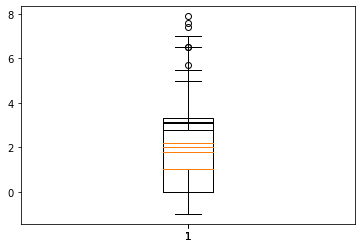

In [15]:
import matplotlib.pyplot as plt

plt.boxplot(test_mid_df['points_per_game'])
sns.b

CREATE GOALKEEPER CLUSTERS

In [8]:
import matplotlib.pyplot as plt

In [9]:
test_gk_df.columns

Index(['code', 'element_type', 'id', 'first_name', 'now_cost',
       'points_per_game', 'team', 'team_code', 'total_points', 'start_cost',
       'value_form', 'value_season', 'minutes', 'goals_scored', 'assists',
       'clean_sheets', 'goals_conceded', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'direct_freekicks_order', 'penalties_order'],
      dtype='object')

Text(0.5, 1.0, 'Penalties saved')

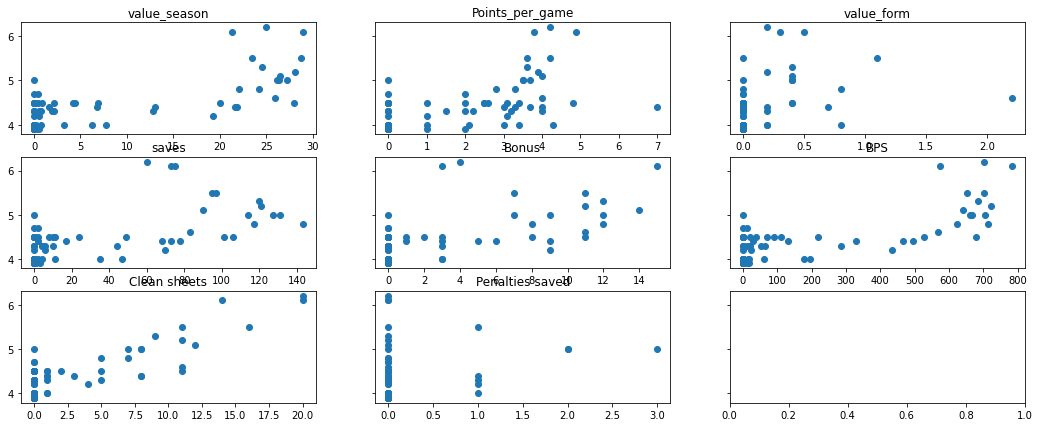

In [10]:
"value"
fig,ax = plt.subplots(3,3, sharey = True, figsize = (18,7))

ax[0][0].scatter(test_gk_df['value_season'], test_gk_df['now_cost'])
ax[0][0].set_title("value_season")

ax[0][2].scatter(test_gk_df['value_form'], test_gk_df['now_cost'])
ax[0][2].set_title("value_form")

ax[0][1].scatter(test_gk_df['points_per_game'], test_gk_df['now_cost'])
ax[0][1].set_title("Points_per_game")

ax[1][0].scatter(test_gk_df['saves'], test_gk_df['now_cost'])
ax[1][0].set_title("saves")

ax[1][1].scatter(test_gk_df['bonus'], test_gk_df['now_cost'])
ax[1][1].set_title("Bonus")

ax[1][2].scatter(test_gk_df['bps'], test_gk_df['now_cost'])
ax[1][2].set_title("BPS")

ax[2][0].scatter(test_gk_df['clean_sheets'], test_gk_df['now_cost'])
ax[2][0].set_title("Clean sheets")

ax[2][1].scatter(test_gk_df['penalties_saved'], test_gk_df['now_cost'])
ax[2][1].set_title("Penalties saved")

In [11]:
test_gk_df[test_gk_df['value_season'] > 20]

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
32,225321,1,559,Aaron,5.1,4.0,1,3,135,4.5,0.4,26.5,3060,0,0,12,39,0,0,1,0,90,14,641,690.2,1.0,0.0,0.0,0.0
49,98980,1,30,Emiliano,5.5,3.6,2,7,129,5.5,0.0,23.5,3240,0,0,11,48,1,0,4,0,95,7,651,755.8,0.0,0.0,0.0,0.0
90,154561,1,80,David,4.4,4.0,3,94,95,4.5,0.2,21.6,2160,0,0,8,27,0,0,1,0,78,5,496,593.4,10.0,0.0,0.0,0.0
138,215059,1,69,Robert,4.5,3.4,4,36,126,4.5,0.4,28.0,3330,0,0,11,42,0,0,3,1,101,8,679,811.0,30.0,0.0,0.0,0.0
175,98747,1,112,Nick,5.3,3.6,5,90,130,5.5,0.4,24.5,3240,0,0,9,47,0,0,1,0,120,12,683,902.8,20.0,0.0,0.0,0.0
218,228286,1,143,Edouard,6.1,3.8,6,8,130,6.0,0.3,21.3,3060,0,0,14,31,0,0,3,0,73,3,573,585.8,0.0,0.0,0.0,0.0
229,40836,1,146,Vicente,4.6,4.0,7,31,119,4.5,2.2,25.9,2655,0,0,11,33,0,0,2,0,83,11,567,614.6,0.0,0.0,0.0,0.0
266,111234,1,170,Jordan,4.8,3.3,8,11,116,5.0,0.0,24.2,3150,0,0,7,58,0,0,2,0,117,12,624,863.2,43.0,0.0,0.0,0.0
302,17745,1,200,Kasper,5.0,3.5,9,13,131,5.0,0.4,26.2,3330,0,0,7,58,2,0,1,0,131,12,706,1076.6,11.2,0.0,0.0,0.0
351,437495,1,199,Illan,4.8,2.8,10,2,106,5.0,0.8,22.1,3384,0,0,5,79,0,0,2,0,143,8,713,1090.6,0.0,0.0,0.0,0.0


In [12]:
test_gk_df[test_gk_df['points_per_game'] > 3]

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
32,225321,1,559,Aaron,5.1,4.0,1,3,135,4.5,0.4,26.5,3060,0,0,12,39,0,0,1,0,90,14,641,690.2,1.0,0.0,0.0,0.0
49,98980,1,30,Emiliano,5.5,3.6,2,7,129,5.5,0.0,23.5,3240,0,0,11,48,1,0,4,0,95,7,651,755.8,0.0,0.0,0.0,0.0
90,154561,1,80,David,4.4,4.0,3,94,95,4.5,0.2,21.6,2160,0,0,8,27,0,0,1,0,78,5,496,593.4,10.0,0.0,0.0,0.0
138,215059,1,69,Robert,4.5,3.4,4,36,126,4.5,0.4,28.0,3330,0,0,11,42,0,0,3,1,101,8,679,811.0,30.0,0.0,0.0,0.0
175,98747,1,112,Nick,5.3,3.6,5,90,130,5.5,0.4,24.5,3240,0,0,9,47,0,0,1,0,120,12,683,902.8,20.0,0.0,0.0,0.0
204,109745,1,129,Kepa,4.5,4.8,6,8,19,5.0,0.0,4.2,360,0,0,2,2,0,0,0,0,11,1,89,95.6,0.0,0.0,0.0,0.0
218,228286,1,143,Edouard,6.1,3.8,6,8,130,6.0,0.3,21.3,3060,0,0,14,31,0,0,3,0,73,3,573,585.8,0.0,0.0,0.0,0.0
229,40836,1,146,Vicente,4.6,4.0,7,31,119,4.5,2.2,25.9,2655,0,0,11,33,0,0,2,0,83,11,567,614.6,0.0,0.0,0.0,0.0
239,105666,1,156,Jack,4.4,3.3,7,31,30,4.5,0.0,6.8,765,0,0,1,13,1,0,0,0,17,3,132,155.0,0.0,0.0,0.0,0.0
266,111234,1,170,Jordan,4.8,3.3,8,11,116,5.0,0.0,24.2,3150,0,0,7,58,0,0,2,0,117,12,624,863.2,43.0,0.0,0.0,0.0


In [13]:
test_defender_df

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
4,58822,2,5,Cédric,4.2,2.3,1,3,48,4.5,3.3,11.4,1481,1,1,3,27,0,0,3,0,0,3,292,318.4,327.1,111.0,3.0,0.0
7,92371,2,8,Pablo,4.2,0.5,1,3,1,4.5,0.0,0.2,180,0,0,0,4,0,0,1,0,0,0,35,55.4,12.3,11.0,0.0,0.0
8,98745,2,9,Héctor,4.8,0.0,1,3,0,5.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
9,111457,2,11,Sead,4.2,0.0,1,3,0,4.5,0.0,0.0,91,0,0,0,5,0,0,1,0,0,0,6,4.2,0.2,0.0,0.0,0.0
12,156074,2,14,Rob,4.1,1.9,1,3,29,4.5,0.5,7.1,840,1,0,2,16,0,0,2,1,0,2,152,253.0,8.6,49.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,448514,2,470,Rayan,4.1,3.8,20,39,87,4.5,0.2,21.2,1826,1,4,7,26,0,0,4,0,0,10,367,390.8,323.2,174.0,0.0,0.0
727,481626,2,549,Christian,4.0,0.0,20,39,0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
731,490721,2,635,Hugo,4.0,0.0,20,39,0,4.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
733,510362,2,685,Toti António,4.4,1.5,20,39,6,4.5,0.2,1.4,360,0,0,0,6,0,0,1,0,0,0,52,87.0,4.5,28.0,0.0,0.0


Text(0.5, 1.0, 'Penalties saved')

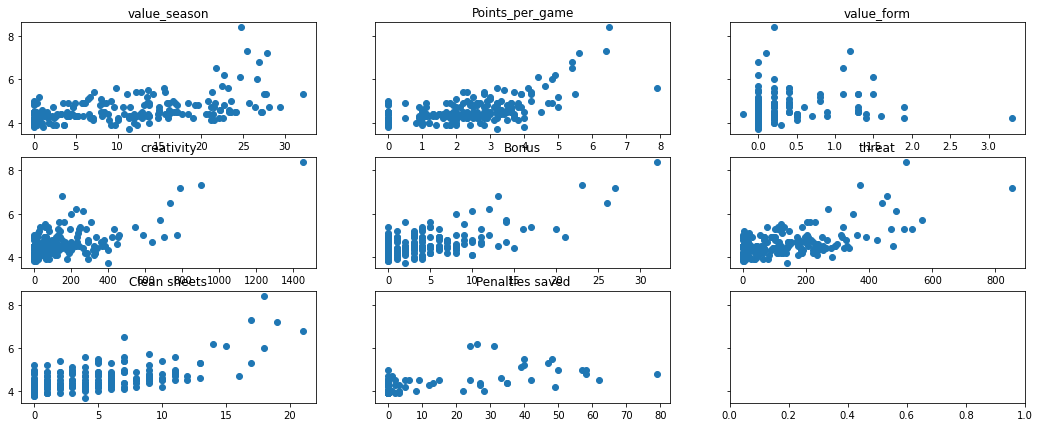

In [14]:
fig,ax = plt.subplots(3,3, sharey = True, figsize = (18,7))

ax[0][0].scatter(test_defender_df['value_season'], test_defender_df['now_cost'])
ax[0][0].set_title("value_season")

ax[0][2].scatter(test_defender_df['value_form'], test_defender_df['now_cost'])
ax[0][2].set_title("value_form")

ax[0][1].scatter(test_defender_df['points_per_game'], test_defender_df['now_cost'])
ax[0][1].set_title("Points_per_game")

ax[1][0].scatter(test_defender_df['creativity'], test_defender_df['now_cost'])
ax[1][0].set_title("creativity")

ax[1][1].scatter(test_defender_df['bonus'], test_defender_df['now_cost'])
ax[1][1].set_title("Bonus")

ax[1][2].scatter(test_defender_df['threat'], test_defender_df['now_cost'])
ax[1][2].set_title("threat")

ax[2][0].scatter(test_defender_df['clean_sheets'], test_defender_df['now_cost'])
ax[2][0].set_title("Clean sheets")

ax[2][1].scatter(test_gk_df['goals_conceded'], test_gk_df['now_cost'])
ax[2][1].set_title("Penalties saved")

In [15]:
test_defender_df[test_defender_df['threat'] > 600]

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
415,121145,2,256,João Pedro Cavaco,7.2,5.6,12,43,201,6.0,0.1,27.9,3227,1,11,19,25,0,0,7,0,0,27,829,796.0,786.9,851.0,0.0,0.0


In [16]:
test_defender_df[test_defender_df['value_form'] > 2.0]

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
4,58822,2,5,Cédric,4.2,2.3,1,3,48,4.5,3.3,11.4,1481,1,1,3,27,0,0,3,0,0,3,292,318.4,327.1,111.0,3.0,0.0


In [17]:
test_defender_df[test_defender_df['value_season'] > 20]

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
14,192895,2,16,Kieran,4.9,4.8,1,3,106,5.0,0.0,21.6,1916,1,3,11,21,0,0,0,0,0,11,454,365.2,335.9,198.0,0.0,0.0
20,226597,2,23,Gabriel,5.3,4.2,1,3,146,5.0,1.5,27.5,3063,5,0,13,38,0,0,6,1,0,16,682,746.8,131.6,470.0,0.0,0.0
25,198869,2,67,Ben,4.6,3.3,1,3,107,4.5,0.0,23.3,2880,0,0,13,35,0,0,3,0,0,9,557,592.8,182.3,150.0,0.0,0.0
56,149484,2,38,Tyrone,5.0,3.3,2,7,118,5.0,0.0,23.6,3188,1,4,11,49,0,0,11,0,0,12,596,667.2,130.9,309.0,0.0,0.0
60,199796,2,44,Matthew,5.3,3.9,2,7,147,5.0,1.3,27.7,3377,4,3,13,50,0,0,8,0,0,11,623,754.8,432.1,534.0,0.0,0.0
86,61810,2,76,Pontus,4.5,3.3,3,94,122,4.5,0.2,27.1,3321,3,4,8,56,0,0,7,0,0,13,616,782.0,67.2,476.0,0.0,0.0
93,194010,2,83,Rico,4.5,3.2,3,94,108,4.5,0.4,24.0,2775,3,0,9,41,0,0,2,0,0,4,453,451.0,325.4,235.0,0.0,0.0
101,231065,2,91,Ethan,4.4,2.8,3,94,90,4.5,0.0,20.5,2694,1,1,7,43,0,0,1,0,0,7,517,648.8,151.7,335.0,0.0,0.0
132,111478,2,62,Joël,4.2,2.8,4,36,95,4.5,1.9,22.6,2874,1,1,8,39,0,0,6,0,0,5,545,582.2,275.8,183.0,0.0,0.0
154,179268,2,584,Marc,4.9,3.6,4,36,126,5.0,0.4,25.7,3089,1,1,11,39,0,0,6,0,0,21,673,679.8,700.8,207.0,0.0,0.0


STRIKERS AND MIDFIELDERS

In [20]:
test_mid_df.columns

Index(['code', 'element_type', 'id', 'first_name', 'now_cost',
       'points_per_game', 'team', 'team_code', 'total_points', 'start_cost',
       'value_form', 'value_season', 'minutes', 'goals_scored', 'assists',
       'clean_sheets', 'goals_conceded', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'direct_freekicks_order', 'penalties_order'],
      dtype='object')

Text(0.5, 1.0, 'Total points')

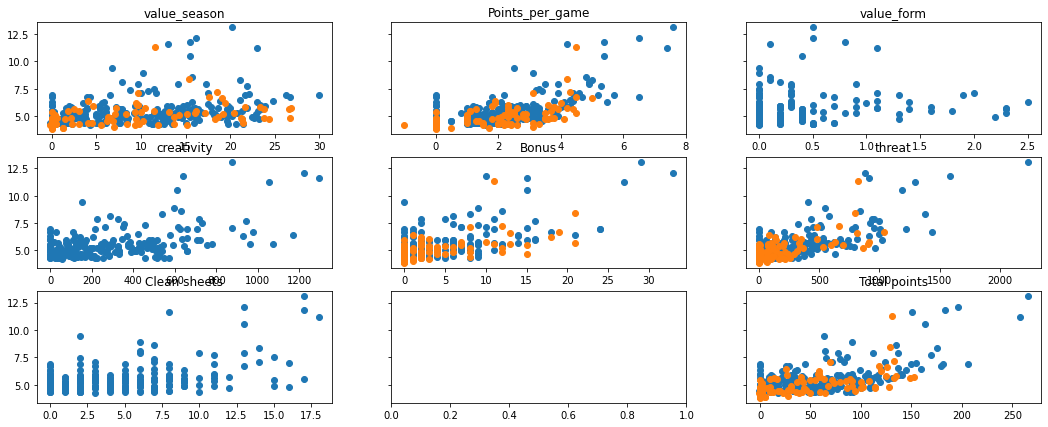

In [30]:
fig,ax = plt.subplots(3,3, sharey = True, figsize = (18,7))

ax[0][0].scatter(test_mid_df['value_season'], test_mid_df['now_cost'])
ax[0][0].scatter(test_striker_df['value_season'], test_striker_df['now_cost'])
ax[0][0].set_title("value_season")

ax[0][2].scatter(test_mid_df['value_form'], test_mid_df['now_cost'])
ax[0][2].set_title("value_form")

ax[0][1].scatter(test_mid_df['points_per_game'], test_mid_df['now_cost'])
ax[0][1].scatter(test_striker_df['points_per_game'], test_striker_df['now_cost'])
ax[0][1].set_title("Points_per_game")

ax[1][0].scatter(test_mid_df['creativity'], test_mid_df['now_cost'])
ax[1][0].set_title("creativity")

ax[1][1].scatter(test_mid_df['bonus'], test_mid_df['now_cost'])
ax[1][1].scatter(test_striker_df['bonus'], test_striker_df['now_cost'])
ax[1][1].set_title("Bonus")

ax[1][2].scatter(test_mid_df['threat'], test_mid_df['now_cost'])
ax[1][2].scatter(test_striker_df['threat'], test_striker_df['now_cost'])
ax[1][2].set_title("threat")

ax[2][0].scatter(test_mid_df['clean_sheets'], test_mid_df['now_cost'])
ax[2][0].set_title("Clean sheets")

ax[2][2].scatter(test_mid_df['total_points'], test_mid_df['now_cost'])
ax[2][2].scatter(test_striker_df['total_points'], test_striker_df['now_cost'])
ax[2][2].set_title("Total points")


In [22]:
test_mid_df[test_mid_df['value_season'] > 25]

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
19,223340,3,22,Bukayo,6.7,4.7,1,3,179,6.5,0.7,26.7,2978,11,9,13,39,0,0,6,0,0,18,566,790.4,977.8,1434.0,0.0,3.0
314,172780,3,212,James,6.9,5.2,9,13,181,7.0,1.9,26.2,2454,12,11,5,41,0,0,3,0,0,24,637,827.4,706.2,770.0,1.0,4.0
681,178186,3,420,Jarrod,6.9,5.7,19,21,206,6.5,0.3,29.9,2987,12,17,8,46,0,0,6,0,0,24,586,822.2,627.2,1223.0,0.0,0.0


In [23]:
test_mid_df[test_mid_df['creativity'] > 800]

,code,element_type,id,first_name,now_cost,points_per_game,team,team_code,total_points,start_cost,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,direct_freekicks_order,penalties_order
19,223340,3,22,Bukayo,6.7,4.7,1,3,179,6.5,0.7,26.7,2978,11,9,13,39,0,0,6,0,0,18,566,790.4,977.8,1434.0,0.0,3.0
31,184029,3,558,Martin,5.6,3.6,1,3,131,5.5,1.4,23.4,2782,7,4,11,39,0,0,4,0,0,9,541,676.6,1073.2,639.0,1.0,0.0
126,60307,3,55,Pascal,5.6,3.0,4,36,88,6.0,2.3,15.7,2033,2,5,8,24,0,1,1,0,0,7,405,475.2,961.8,370.0,6.0,2.0
213,184341,3,138,Mason,7.7,5.3,6,8,169,7.5,0.3,21.9,2358,11,11,11,25,0,0,4,0,0,16,597,823.8,944.9,995.0,2.0,2.0
348,219961,3,196,Raphael,6.3,4.1,10,2,145,6.5,1.4,23.0,2916,11,4,5,68,0,0,7,0,0,14,457,770.8,928.6,915.0,1.0,2.0
382,118748,3,233,Mohamed,13.1,7.6,11,14,265,12.5,0.5,20.2,2758,23,14,17,22,0,1,1,0,0,29,756,1241.0,875.9,2230.0,2.0,2.0
410,61366,3,251,Kevin,12.1,6.5,12,43,196,12.0,0.5,16.2,2196,15,8,13,22,0,0,2,0,0,33,732,1005.8,1222.0,880.0,2.0,3.0
420,165809,3,261,Bernardo Mota,7.0,4.4,12,43,155,7.0,0.3,22.1,2856,8,8,16,23,0,0,6,0,0,15,663,739.4,876.1,958.0,0.0,0.0
448,141746,3,277,Bruno Miguel,11.6,4.2,13,1,151,12.0,0.1,13.0,3110,10,7,8,54,0,2,10,0,0,15,626,906.6,1291.9,910.0,2.0,2.0
553,101178,3,341,James,6.4,4.4,16,20,159,6.5,1.1,24.8,3215,10,5,7,65,0,0,3,1,0,21,769,970.0,1170.6,413.0,1.0,1.0
